### 서울특별시 5대 범죄 발생현황 

- 서울특별시 5대 범죄 발생현황 통계
https://data.seoul.go.kr/dataList/316/S/2/datasetView.do

In [341]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [342]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정

In [343]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [344]:
raw_data = pd.read_csv("./서울시 5대 범죄 발생현황 통계.txt", sep='\t', thousands = ',') # thousands -> 질문! (안된다!)
raw_data.head() # 5개씩 확인 (상단)
raw_data.tail() # 5개씩 확인 (하단)

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2017,합계,"107,835","79,865",142,140,169,170,"6,963","6,558","41,162","21,421","59,399","51,576"
2,2017,종로구,"4,057","4,437",7,9,10,15,253,"1,412","1,644",905,"2,143","2,096"
3,2017,중구,"4,184","2,851",1,-,9,9,267,149,"1,846",889,"2,061","1,804"
4,2017,용산구,"4,060","2,936",1,1,5,4,327,289,"1,346",626,"2,381","2,016"


,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
74,2019,관악구,"5,328","3,810",13,10,10,11,408,335,"2,223","1,085","2,674","2,369"
75,2019,서초구,"5,542","3,750",5,5,7,5,616,412,"2,270","1,118","2,644","2,210"
76,2019,강남구,"7,304","5,069",5,3,5,6,666,562,"2,970","1,339","3,658","3,159"
77,2019,송파구,"5,698","3,799",7,8,10,10,273,230,"2,416","1,016","2,992","2,535"
78,2019,강동구,"4,014","2,955",6,5,15,14,180,155,"1,650",907,"2,163","1,874"


In [345]:
# 데이터 파악!
raw_data.info() # 총 79개의 행 / 14개의 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        79 non-null     object
 1   자치구       79 non-null     object
 2   합계        79 non-null     object
 3   합계.1      79 non-null     object
 4   살인        79 non-null     object
 5   살인.1      79 non-null     object
 6   강도        79 non-null     object
 7   강도.1      79 non-null     object
 8   강간강제추행    79 non-null     object
 9   강간강제추행.1  79 non-null     object
 10  절도        79 non-null     object
 11  절도.1      79 non-null     object
 12  폭력        79 non-null     object
 13  폭력.1      79 non-null     object
dtypes: object(14)
memory usage: 8.8+ KB


In [346]:
# raw_data의 컬럼명과 index 명을 확인!

raw_data.columns # 열 제목
raw_data.index   # 행 제목(행번호)

Index(['기간', '자치구', '합계', '합계.1', '살인', '살인.1', '강도', '강도.1', '강간강제추행',
       '강간강제추행.1', '절도', '절도.1', '폭력', '폭력.1'],
      dtype='object')

RangeIndex(start=0, stop=79, step=1)

In [347]:
# raw_data의 컬럼명을 보기 쉽게 (발생/검거 구분) 수정!

raw_data.rename(columns={
        '합계' : '합계_발생',
        '합계.1' : '합계_검거',
        '살인' : '살인_발생',
        '살인.1' : '살인_검거',
        '강도' : '강도_발생',
        '강도.1' : '강도_검거',
        '강간강제추행' : '강간강제추행_발생',
        '강간강제추행.1' : '강간강제추행_검거',   
        '절도' : '절도_발생',
        '절도.1' : '절도_검거',    
        '폭력' : '폭력_발생',
        '폭력.1' : '폭력_검거',    
}, inplace=True) # inplace=True -> 원본 반영

In [348]:
raw_data.head()

,기간,자치구,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2017,합계,"107,835","79,865",142,140,169,170,"6,963","6,558","41,162","21,421","59,399","51,576"
2,2017,종로구,"4,057","4,437",7,9,10,15,253,"1,412","1,644",905,"2,143","2,096"
3,2017,중구,"4,184","2,851",1,-,9,9,267,149,"1,846",889,"2,061","1,804"
4,2017,용산구,"4,060","2,936",1,1,5,4,327,289,"1,346",626,"2,381","2,016"


In [349]:
# 첫 번째 행은 빼고, crime에 저장 
# (기간	자치구	발생	검거	발생	검거	발생	검거	발생	검거	발생	검거	발생	검거) -> 삭제

crime = raw_data.iloc[1:len(raw_data)+1]

In [350]:
crime.head()

,기간,자치구,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
1,2017,합계,"107,835","79,865",142,140,169,170,"6,963","6,558","41,162","21,421","59,399","51,576"
2,2017,종로구,"4,057","4,437",7,9,10,15,253,"1,412","1,644",905,"2,143","2,096"
3,2017,중구,"4,184","2,851",1,-,9,9,267,149,"1,846",889,"2,061","1,804"
4,2017,용산구,"4,060","2,936",1,1,5,4,327,289,"1,346",626,"2,381","2,016"
5,2017,성동구,"2,767","2,031",1,1,3,3,132,106,"1,072",543,"1,559","1,378"


### 2017년, 2018년, 2019년 각각 연도별로 구분해서 데이터프레임을 만든다

In [351]:
# 기간이 2017년인 행을 추출할 index를 만든다
_2017 = (crime['기간'] == '2017')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
crime_2017 = crime[_2017][1:]

crime_2017.reset_index(inplace=True, drop=True)

# 결과를 출력합니다.
crime_2017.head()

,기간,자치구,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,2017,종로구,"4,057","4,437",7,9,10,15,253,"1,412","1,644",905,"2,143","2,096"
1,2017,중구,"4,184","2,851",1,-,9,9,267,149,"1,846",889,"2,061","1,804"
2,2017,용산구,"4,060","2,936",1,1,5,4,327,289,"1,346",626,"2,381","2,016"
3,2017,성동구,"2,767","2,031",1,1,3,3,132,106,"1,072",543,"1,559","1,378"
4,2017,광진구,"4,646","3,289",6,5,13,8,261,208,"2,220","1,168","2,146","1,900"


In [352]:
# 기간이 2018년인 행을 추출할 index를 만든다
_2018 = (crime['기간'] == '2018')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
crime_2018 = crime[_2018][1:]

crime_2018.reset_index(inplace=True, drop=True)

# 결과를 출력합니다.
crime_2018.head()

,기간,자치구,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,2018,종로구,"3,690","3,913",6,7,3,7,236,"1,100","1,483",969,"1,962","1,830"
1,2018,중구,"4,030","2,679",2,2,11,11,207,115,"1,855",832,"1,955","1,719"
2,2018,용산구,"3,411","2,543",1,1,3,2,331,285,"1,096",522,"1,980","1,733"
3,2018,성동구,"2,457","1,787",2,2,5,8,126,102,999,487,"1,325","1,188"
4,2018,광진구,"3,915","2,789",7,5,2,1,229,184,"1,769",974,"1,908","1,625"


In [353]:
# 기간이 2019년인 행을 추출할 index를 만든다
_2019 = (crime['기간'] == '2019')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
crime_2019 = crime[_2019][1:]

crime_2019.reset_index(inplace=True, drop=True)

# 결과를 출력합니다.
crime_2019.head()

,기간,자치구,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
0,2019,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
1,2019,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
2,2019,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"
3,2019,성동구,"2,512","1,838",6,5,9,10,133,96,970,511,"1,394","1,216"
4,2019,광진구,"4,011","2,816",4,5,6,5,273,213,"1,875","1,008","1,853","1,585"


### 서울특별시에 5대 범죄가 많이 발생한 구를 순서대로 내림차순하여 정렬한다 (2017, 2018, 2019)

In [354]:
# 2017년도 서울시 5대 범죄가 많이 발생한 구를 순서대로 내림차순 정렬

data_17 = crime_2017.sort_values(by='합계_발생', ascending = False) # 내림차순 -> 범죄가 발생이 많이 한 곳부터 차례로
data_17.set_index('자치구', inplace=True)
data_17.head()

,기간,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
자치구,,,,,,,,,,,,,
강남구,2017,"7,720","5,321",7,7,20,24,607,496,"3,130","1,383","3,956","3,411"
영등포구,2017,"5,969","4,012",15,13,5,5,455,267,"2,304","1,108","3,190","2,619"
송파구,2017,"5,576","3,870",6,6,1,3,288,242,"2,274","1,026","3,007","2,593"
관악구,2017,"5,525","4,154",8,7,7,6,379,323,"1,979","1,152","3,152","2,666"
마포구,2017,"5,278","3,499",3,3,8,8,500,429,"2,094",837,"2,673","2,222"


In [355]:
# 2018년도 서울시 5대 범죄가 많이 발생한 구를 순서대로 내림차순 정렬

data_18 = crime_2018.sort_values(by='합계_발생', ascending = False)
data_18.set_index('자치구', inplace=True)
data_18.head()

,기간,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
자치구,,,,,,,,,,,,,
강남구,2018,"7,513","5,196",10,13,14,10,600,523,"3,004","1,317","3,885","3,333"
영등포구,2018,"5,840","3,922",17,15,8,6,391,267,"2,292","1,064","3,132","2,570"
송파구,2018,"5,807","4,051",5,6,6,8,309,254,"2,352","1,034","3,135","2,749"
마포구,2018,"5,172","3,569",6,6,6,7,473,396,"2,011",882,"2,676","2,278"
관악구,2018,"5,026","3,653",9,9,10,12,352,305,"2,012","1,025","2,643","2,302"


In [356]:
# 2019년도 서울시 5대 범죄가 많이 발생한 구를 순서대로 내림차순 정렬

data_19 = crime_2019.sort_values(by='합계_발생', ascending = False)
data_19.set_index('자치구', inplace=True)
data_19.head()

,기간,합계_발생,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
자치구,,,,,,,,,,,,,
강남구,2019,"7,304","5,069",5,3,5,6,666,562,"2,970","1,339","3,658","3,159"
영등포구,2019,"5,820","3,787",10,10,3,3,356,239,"2,409","1,068","3,042","2,467"
송파구,2019,"5,698","3,799",7,8,10,10,273,230,"2,416","1,016","2,992","2,535"
서초구,2019,"5,542","3,750",5,5,7,5,616,412,"2,270","1,118","2,644","2,210"
관악구,2019,"5,328","3,810",13,10,10,11,408,335,"2,223","1,085","2,674","2,369"


### 시각화 작업

In [357]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### (thousands = ',') -> 안되므로 사용자 정의 함수를 만들어 합계_발생 열을 int형 열로 바꾼다

In [358]:
# 사용자 정의 함수!
# ','를 없애고, int형으로 바꾸기!

def to_int(data) :
    data = data.replace(',','')
    data = int(data)
    return data

In [359]:
# 위의 함수를 이용해 ,를 삭제하고 int형으로 바꾸기

data_17_int = data_17.합계_발생.apply(to_int)
data_18_int = data_18.합계_발생.apply(to_int)
data_19_int = data_19.합계_발생.apply(to_int)

In [360]:
# 만든 Series를 첫번째 열에 삽입

data_17.insert(1, '합계_발생_int', data_17_int)
data_18.insert(1, '합계_발생_int', data_18_int)
data_19.insert(1, '합계_발생_int', data_19_int)

In [361]:
# 원래의 "합계_발생" 열은 삭제!

data_17.drop(columns=["합계_발생"],inplace=True)
data_18.drop(columns=["합계_발생"],inplace=True)
data_19.drop(columns=["합계_발생"],inplace=True)

In [367]:
# 잘 들어가져있는지 대표로 하나를 확인!

data_17.head()

,기간,합계_발생_int,합계_검거,살인_발생,살인_검거,강도_발생,강도_검거,강간강제추행_발생,강간강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
자치구,,,,,,,,,,,,,
강남구,2017,7720,"5,321",7,7,20,24,607,496,"3,130","1,383","3,956","3,411"
영등포구,2017,5969,"4,012",15,13,5,5,455,267,"2,304","1,108","3,190","2,619"
송파구,2017,5576,"3,870",6,6,1,3,288,242,"2,274","1,026","3,007","2,593"
관악구,2017,5525,"4,154",8,7,7,6,379,323,"1,979","1,152","3,152","2,666"
마포구,2017,5278,"3,499",3,3,8,8,500,429,"2,094",837,"2,673","2,222"


### 2017년, 2018년, 2019년 각 구별 범죄 발생합계를 그래프로 표현!

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2017년 서울특별시 5대 범죄 발생합계')

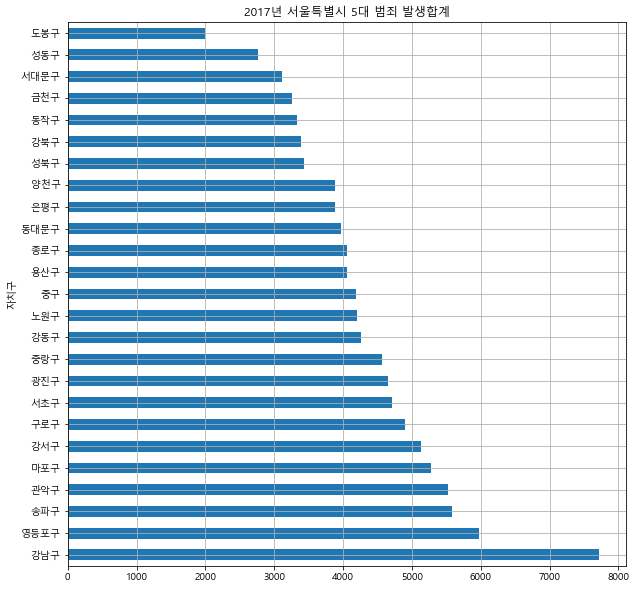

In [368]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
data_17['합계_발생_int'].plot(kind='barh', grid=True)
plt.title('2017년 서울특별시 5대 범죄 발생합계')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2018년 서울특별시 5대 범죄 발생합계')

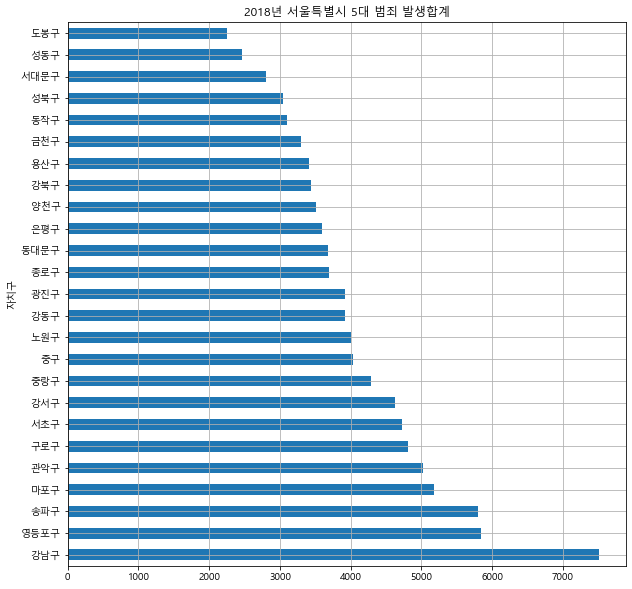

In [369]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
data_18['합계_발생_int'].plot(kind='barh', grid=True)
plt.title('2018년 서울특별시 5대 범죄 발생합계')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='자치구'>

Text(0.5, 1.0, '2019년 서울특별시 5대 범죄 발생합계')

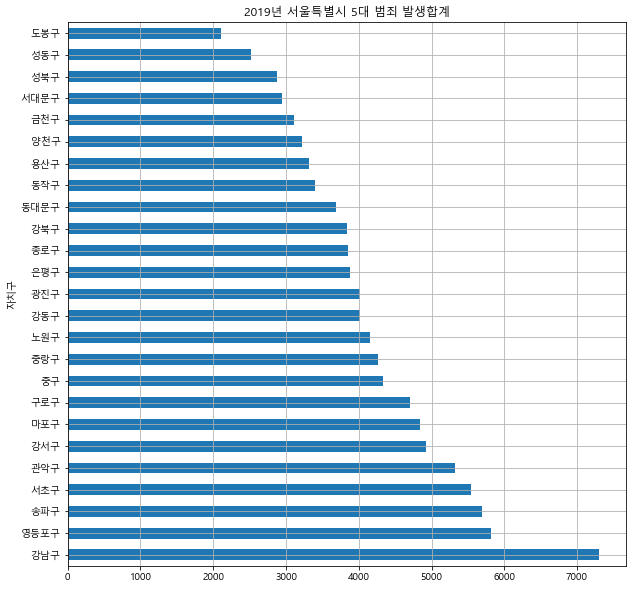

In [370]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
data_19['합계_발생_int'].plot(kind='barh', grid=True)
plt.title('2019년 서울특별시 5대 범죄 발생합계')
plt.show()

In [366]:
# color=['black', 'silver', 'brown', 'lightsalmon', 'peru',  # 5
#                                  'darkorange', 'gold', 'khaki', 'greenyellow', 'gorestgreen',  # 5
#                                  'ligthseagreen', 'aqua', 'olive', 'steelblue', 'royalblue' # 5
#                                  'slateblue', 'mediumpurple', 'rebeccapurple', 'plum', 'violet' # 5
#                                  'magenta', 'deeppink', 'hotpink', 'crimson', 'lightpink', 'pink' # 5
#                                  ])